# Research Questions:

1. Which pitches were being hit most by Silver Slugger and All Star caliber players at Minute Maid Park in 2017?
2. Which pitch zones were Silver Slugger and All Star caliber players hitting pitches from?
3. How often did Astros players swing at pitches outside of the strike zone?
4. How did Astros players perform on breaking / offspeed pitches compared players from other teams?
5. Other comparisons between Astros players and opposing players.

# Player Classification - Silver Slugger vs All Star:
- The __Silver Slugger__ is awarded to the top _hitter_ at each position.
- __All Star__ players are voted on by fans based on their performance during the current season.
    - Only top performing players are considered for the ballot.
    - These players are usually well rounded and excel at both batting and fielding.

# Pitch Classification:
- Pitches are categorized into 11 types:
    1. 2 - Seam Fastball
    2. 4 - Seam Fastball
    3. Changeup
    4. Curveball
    5. Cutter
    6. Eephus
    7. Knuckle Curve
    8. Pitch Out
    9. Sinker
    10. Slider
    11. Split Finger

# Key Attributes:
   # zone
    - The strike zone is represented by subzones 1-9
    - Subzones 11-14 represent spots for balls outside of the strike zone

<img src = 'https://baseballsavant.mlb.com/sections/statcast_search_v2/images/zones.png' />

   # launch_speed_angle
    - The quality of contact the batter makes with the ball
    
<img src = 'https://baseballsavant.mlb.com/sections/statcast_search_v2/images/speed-angle.png' />

# Data
- Our data comes from the [BaseballSavant](https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=2392&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2017%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=venue&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results) website. 
- This houses MLB's Statcast database, which tracks the ball's movement during every pitch and play.

In [302]:
#import packages to use for analysis
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# reading the csv and loading it to source_data variable
# we do not have an index column 
# low_memory is needed because the file contains a lot of floats
source_data = pd.read_csv('2017_MLB_Data.csv', low_memory=False)

In [303]:
# collect number of rows and columns
rows = source_data.shape[0]
columns = source_data.shape[1]

print('Rows: ', rows)
print('Columns: ', columns)

Rows:  22695
Columns:  89


In [304]:
# display columns missing data ratio
source_data.isna().mean().round(4) * 100

pitch_type               0.14
game_date                0.00
release_speed            0.23
release_pos_x            0.23
release_pos_z            0.23
                         ... 
post_home_score          0.00
post_bat_score           0.00
post_fld_score           0.00
if_fielding_alignment    0.26
of_fielding_alignment    0.26
Length: 89, dtype: float64

In [305]:
# drop columns that have more than 50% cells missing
drop_cols = source_data.columns[source_data.isnull().mean()>0.5]
source_data.drop(drop_cols, axis=1)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 89 columns):
pitch_type                         22664 non-null object
game_date                          22695 non-null object
release_speed                      22643 non-null float64
release_pos_x                      22643 non-null float64
release_pos_z                      22643 non-null float64
player_name                        22695 non-null object
batter                             22695 non-null int64
pitcher                            22695 non-null int64
events                             5836 non-null object
description                        22695 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               22643 non-null float64
des                                5836 non-nul

In [306]:
#Drop columns we don't need
source_data.drop(['umpire','release_pos_x', 'release_pos_z', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'game_type', 'game_year', 'tfs_deprecated', 'tfs_zulu_deprecated', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'bat_score', 'fld_score', 'post_away_score', 'post_home_score', 'post_bat_score', 'post_fld_score'],axis=1, inplace=True)

#Check the data types remaining in the dataset
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 60 columns):
pitch_type                         22664 non-null object
game_date                          22695 non-null object
release_speed                      22643 non-null float64
player_name                        22695 non-null object
batter                             22695 non-null int64
pitcher                            22695 non-null int64
events                             5836 non-null object
description                        22695 non-null object
zone                               22643 non-null float64
des                                5836 non-null object
stand                              22695 non-null object
p_throws                           22695 non-null object
home_team                          22695 non-null object
away_team                          22695 non-null object
type                               22695 non-null object
hit_location                       509

In [307]:
Altuve=source_data[source_data['batter']==514888]

In [308]:
Bregman=source_data[source_data['batter']==608324]

In [309]:
Springer=source_data[source_data['batter']==543807]

In [310]:
Correa=source_data[source_data['batter']==621043]

In [311]:
Ramirez=source_data[source_data['batter']==608070]

In [312]:
Lindor=source_data[source_data['batter']==596019]

In [313]:
Pujols=source_data[source_data['batter']==405395]

In [314]:
Upton=source_data[source_data['batter']==457708]

In [315]:
Trout=source_data[source_data['batter']==545361]

In [316]:
Trumbo=source_data[source_data['batter']==444432]

In [317]:
Hosmer=source_data[source_data['batter']==543333]

In [318]:
Cabrera=source_data[source_data['batter']==408234]

In [319]:
Cruz=source_data[source_data['batter']==443558]

In [320]:
Betts=source_data[source_data['batter']==605141]

In [321]:
Judge=source_data[source_data['batter']==592450]

In [322]:
#Create two subsets of data (One consisting of Astros and one consisting of players from the rest of the league)
Astros=Altuve.append([Bregman, Springer, Correa])
League=Ramirez.append([Lindor, Pujols, Upton, Trout, Trumbo, Hosmer, Cabrera, Cruz, Betts, Judge])

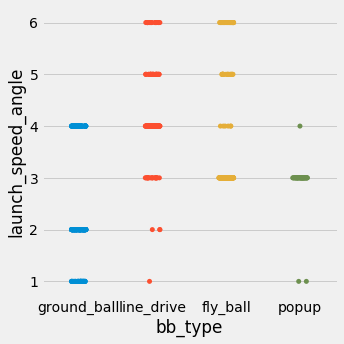

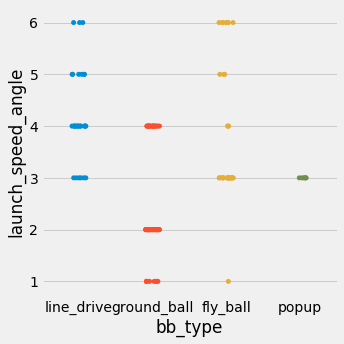

In [327]:
sns.catplot('bb_type','launch_speed_angle', data=Astros, jitter=True)
sns.catplot('bb_type','launch_speed_angle', data=League, jitter=True)

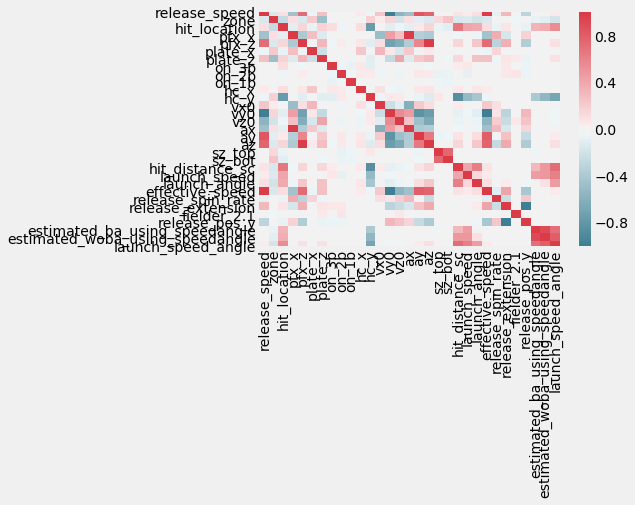

In [298]:
# correlation chart
corr = source_data.loc[:,source_data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [299]:
# displays basic statistics of the given data
source_data.describe()

release_speed         batter        pitcher          zone  \
count   22643.000000   22695.000000   22695.000000  22643.000000   
mean       87.995235  513236.633091  543621.085217      9.624608   
std         6.012770  101091.776151   70691.374294      4.091088   
min        64.800000  134181.000000  112526.000000      1.000000   
25%        83.300000  475174.000000  501789.000000      6.000000   
50%        88.900000  514888.000000  571666.000000     11.000000   
75%        92.900000  592743.000000  605242.000000     13.000000   
max       102.400000  664057.000000  664641.000000     14.000000   

       hit_location         balls       strikes         pfx_x         pfx_z  \
count   5094.000000  22695.000000  22695.000000  22643.000000  22643.000000   
mean       5.069297      0.900815      0.876008     -0.335850      0.489119   
std        2.615730      0.975593      0.822673      0.898025      0.827920   
min        1.000000      0.000000      0.000000     -2.158500     -2.252600   
25%        2.000000      0.000000      0.000000     -1.138300     -0.001350   
50%        5.000000      1.000000      1.000000     -0.427600      0.632500   
75%        7.000000      2.000000      2.000000      0.449200      1.155850   
max        9.000000      3.000000      2.000000      2.048700      2.299200   

            plate_x  ...      pitcher.1    fielder_2.1  release_pos_y  \
count  22643.000000  ...   22695.000000   22675.000000   22643.000000   
mean       0.068319  ...  543621.085217  502098.793164      54.519654   
std        0.861225  ...   70691.374294   64850.740307       0.470298   
min       -4.185100  ...  112526.000000  425772.000000      52.548300   
25%       -0.521200  ...  501789.000000  435263.000000      54.192050   
50%        0.066500  ...  571666.000000  488771.000000      54.501000   
75%        0.662750  ...  605242.000000  572287.000000      54.829900   
max        3.647500  ...  664641.000000  622194.000000      56.769500   

       estimated_ba_using_speedangle  estimated_woba_using_speedangle  \
count                    4021.000000                      4021.000000   
mean                        0.316335                         0.359158   
std                         0.286557                         0.381579   
min                         0.000000                         0.000000   
25%                         0.067000                         0.064000   
50%                         0.209000                         0.213000   
75%                         0.519000                         0.551000   
max                         0.998000                         1.990000   

       launch_speed_angle  at_bat_number  pitch_number    home_score  \
count         4021.000000   22695.000000  22695.000000  22695.000000   
mean             3.077593      38.433576      2.905398      2.504781   
std              1.233427      22.605053      1.738803      2.814522   
min              1.000000       1.000000      1.000000      0.000000   
25%              2.000000      19.000000      1.000000      0.000000   
50%              3.000000      38.000000      3.000000      2.000000   
75%              4.000000      57.000000      4.000000      4.000000   
max              6.000000     108.000000     13.000000     16.000000   

         away_score  
count  22695.000000  
mean       1.970214  
std        2.254612  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        3.000000  
max       13.000000  

[8 rows x 43 columns]

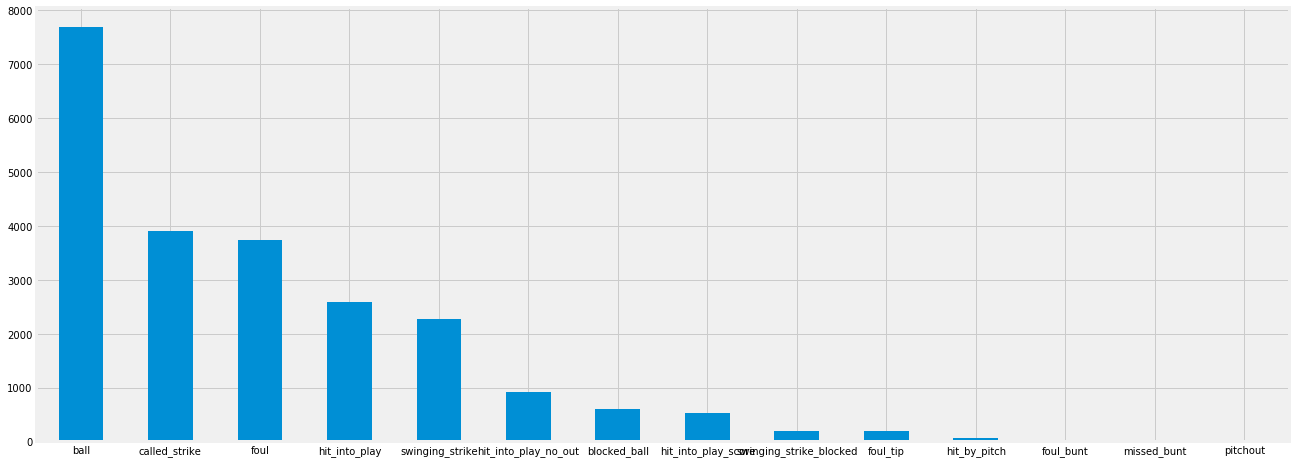

In [148]:
#source_data.plot.bar(x='description', rot=0)
source_data['description'].value_counts().plot(kind='bar', rot=0, figsize=(20,8))

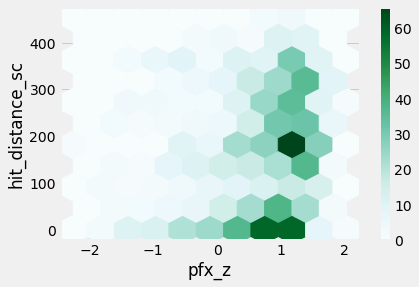

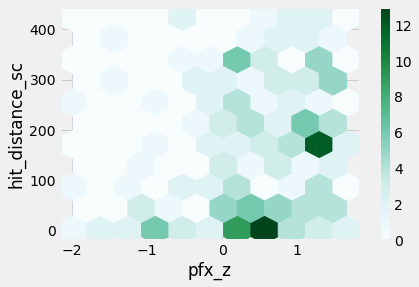

In [332]:
Astros.plot.hexbin(x='pfx_z', y='hit_distance_sc', gridsize=10)
League.plot.hexbin(x='pfx_z', y='hit_distance_sc', gridsize=10)

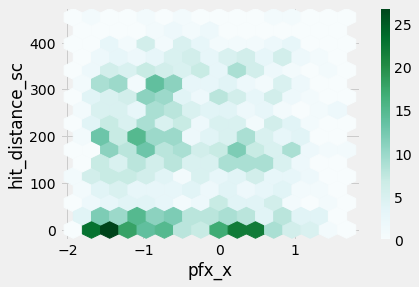

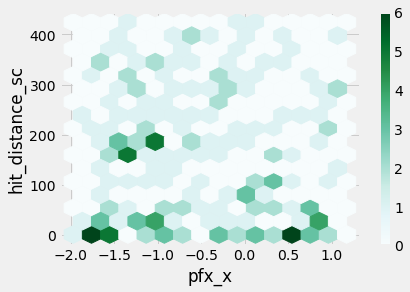

In [337]:
Astros.plot.hexbin(x='pfx_x', y='hit_distance_sc', gridsize=15)
League.plot.hexbin(x='pfx_x', y='hit_distance_sc', gridsize=15)

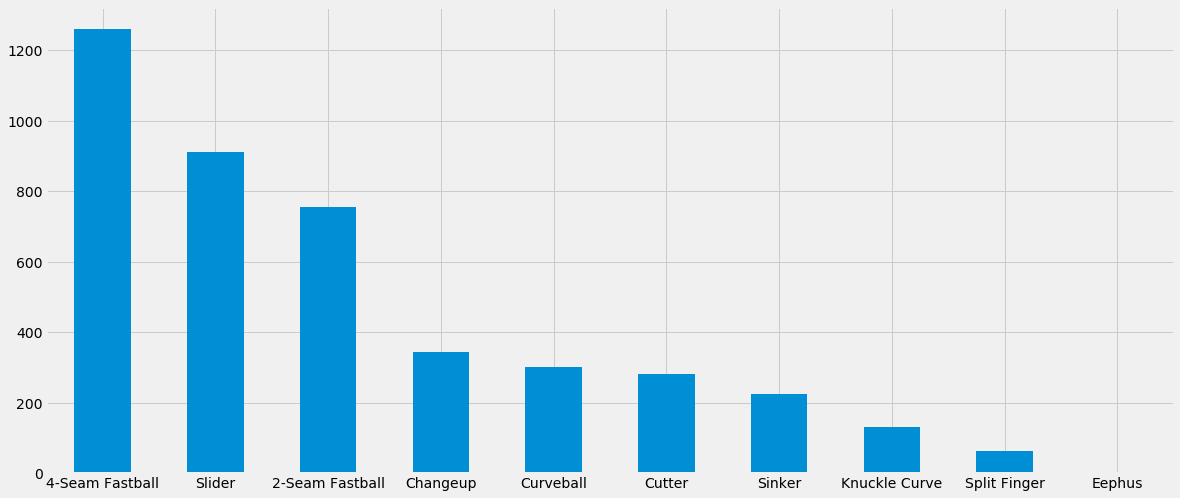

In [340]:
# plots & displays a distrubtion chart of given columns
Astros['pitch_name'].value_counts().plot(kind='bar', rot=0, figsize=(18,8))

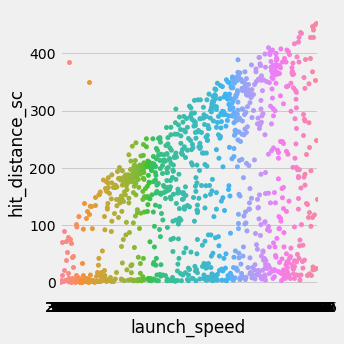

In [360]:
sns.catplot('launch_speed', 'hit_distance_sc', data=Astros)

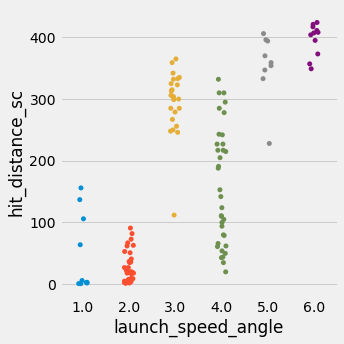

In [342]:
sns.catplot('launch_speed_angle', 'hit_distance_sc', data=League)

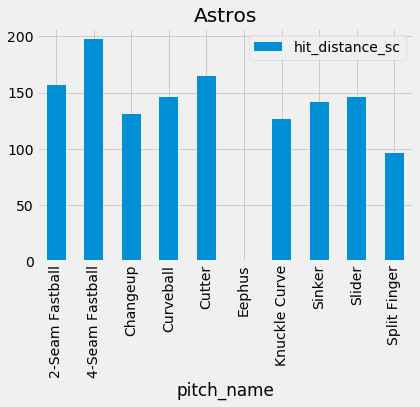

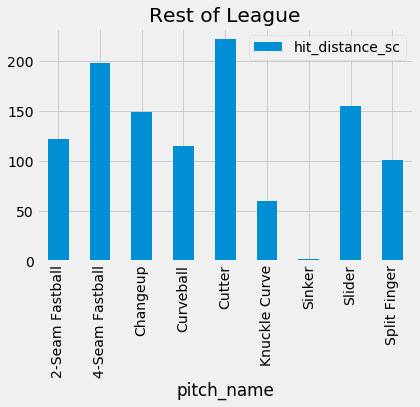

In [357]:
# plots & displays a distrubtion chart of given columns
Astros[['pitch_name', 'hit_distance_sc']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90, title='Astros')
League[['pitch_name', 'hit_distance_sc']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90, title='Rest of League')

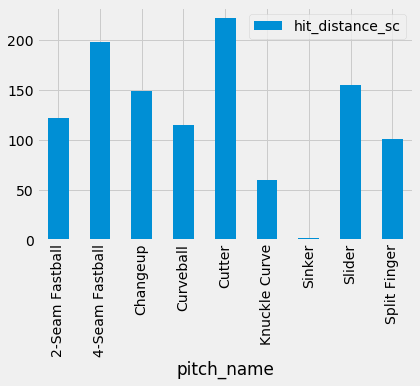

In [354]:
# plots & displays a distrubtion chart of given columns
League[['pitch_name', 'hit_distance_sc']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90)

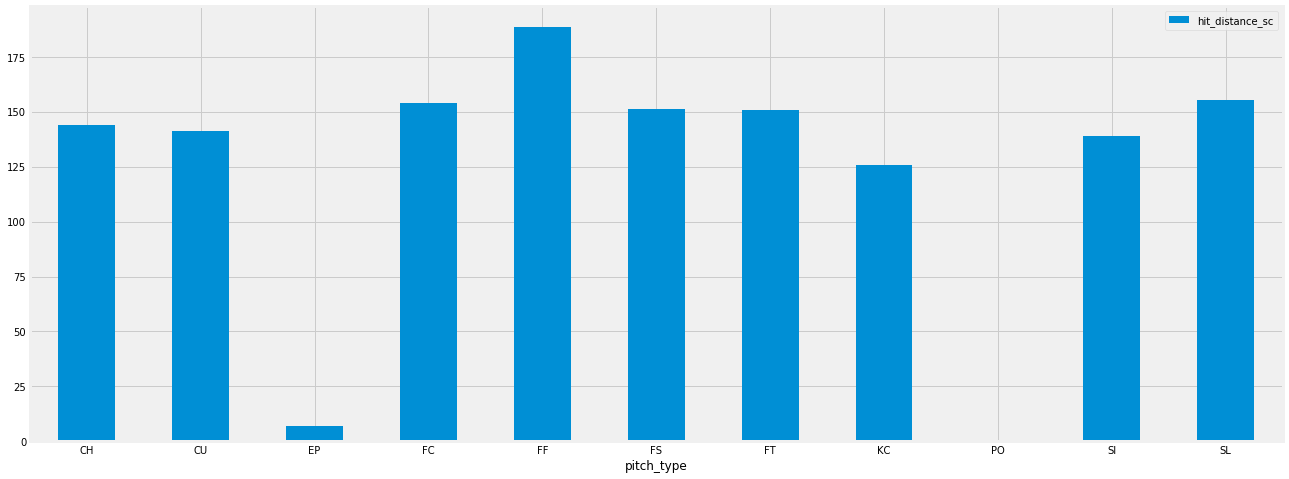

In [108]:
# sex vs. survived
source_data[['pitch_type', 'hit_distance_sc']].groupby(['pitch_type']).mean().plot(kind='bar', rot = 0, figsize=(20,8))

In [103]:
# # sex vs. survived
#source_data.groupby[['home_team', 'hit_distance_sc']].value_counts().plot(kind='bar', figsize=(18,8), rot=0)
source_data[['batter', 'hit_distance_sc']].groupby(['batter']==514888).mean().plot(kind='bar', rot = 0)

KeyError: False

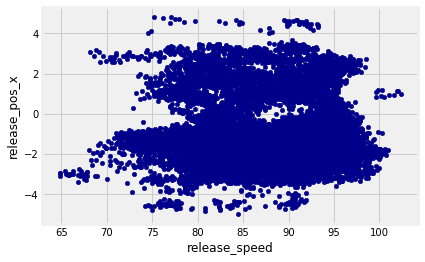

In [13]:
# #scatter plot
ax5 = source_data.plot.scatter(x='release_speed', y='release_pos_x', c='DarkBlue')

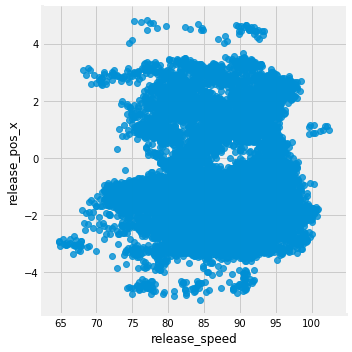

In [14]:
# scatter plot using seaborn
sns.lmplot('release_speed', 'release_pos_x', data=source_data, fit_reg=False)

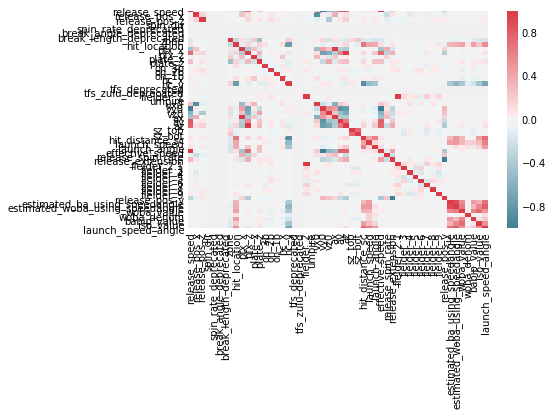

In [12]:
# correlation chart
corr = source_data.loc[:,source_data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Research Answers
1. Which pitches were being hit most by Silver Slugger and All Star caliber players at Minute Maid Park in 2017?
    - 
2. Which pitch zones were Silver Slugger and All Star caliber players hitting pitches from?
    - 
3. How often did Astros players swing at pitches outside of the strike zone?
    - 
4. How did Astros players perform on breaking / offspeed pitches compared players from other teams?
    - 
5. Other comparisons between Astros players and opposing players.
    - 